**In this study, customer segmentation was made using RFM analysis. The behaviors of the customers in the dataset are defined and segmented according to these behaviors.Information about the columns is given below.**
* **master_id :** Unique customer id
* **order_channel :** Which channel of the shopping platform is used (Android, ios, Desktop, Mobile)
* **last_order_channel :** The channel where the most recent purchase was made
* **first_order_date :** Date of the customer's first purchase
* **last_order_date :** Date of the customer's last purchase
* **last_order_date_online :** The date of the last purchase made by the customer on the online platform
* **last_order_date_offline :** The date of the last purchase made by the customer on the offline
* **order_num_total_ever_online :** The total number of purchases made by the customer on the online platform
* **order_num_total_ever_offline :** The total number of purchases made by the customer on the offline platform
* **customer_value_total_ever_offline :** Total fee paid by the customer for offline purchases
* **customer_value_total_ever_online :** Total fee paid by the customer for online purchases
* **interested_in_categories_12  :** List of categories the customer has shopped in the last 12 months

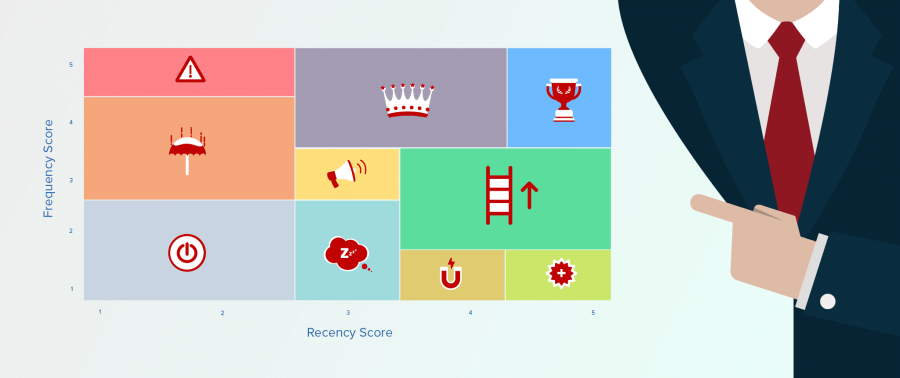

In [1]:
import datetime as dt
import pandas as pd

df_ = pd.read_csv("../input/flo-data-20k/flo_data_20k.csv")

df = df_.copy()

In [2]:
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.0,2.0,150.87,49.99,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.0,1.0,59.99,315.94,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.0,1.0,49.99,113.64,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.0,2.0,120.48,934.21,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.0,1.0,69.98,95.98,"[KADIN, AKTIFSPOR]"


In [3]:
df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12'],
      dtype='object')

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


In [5]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

**New variables have been created for the total number of purchases and the money spent by customers who shop on both online and offline platforms.**

In [7]:
df["order_num_total_ever_omnichannel"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]

df["customer_value_total_ever_omnichannel"] = df["customer_value_total_ever_online"] + df["customer_value_total_ever_offline"]

df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total_ever_omnichannel,customer_value_total_ever_omnichannel
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98


**The names of the variables expressing date are converted to date type.**

In [8]:
date_col_list = [i for i in df.columns if "date" in i]

df[date_col_list] = df[date_col_list].apply(pd.to_datetime)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   master_id                              19945 non-null  object        
 1   order_channel                          19945 non-null  object        
 2   last_order_channel                     19945 non-null  object        
 3   first_order_date                       19945 non-null  datetime64[ns]
 4   last_order_date                        19945 non-null  datetime64[ns]
 5   last_order_date_online                 19945 non-null  datetime64[ns]
 6   last_order_date_offline                19945 non-null  datetime64[ns]
 7   order_num_total_ever_online            19945 non-null  float64       
 8   order_num_total_ever_offline           19945 non-null  float64       
 9   customer_value_total_ever_offline      19945 non-null  float6

**The distribution of the number of customers in the shopping channels according to the total number of products purchased and the total money spent was examined.**

In [9]:
df.groupby("order_channel").agg({"master_id" : "count",
                                 "order_num_total_ever_omnichannel" : "sum",
                                 "customer_value_total_ever_omnichannel": "sum"}).head()

,master_id,order_num_total_ever_omnichannel,customer_value_total_ever_omnichannel
order_channel,,,
Android App,9495,52269.0,7819062.76
Desktop,2735,10920.0,1610321.46
Ios App,2833,15351.0,2525999.93
Mobile,4882,21679.0,3028183.16


**The top 10 paying customers are listed.**

In [10]:
df.groupby("master_id").agg({"customer_value_total_ever_omnichannel" : "sum"}).sort_values("customer_value_total_ever_omnichannel", ascending = False).head(10)

,customer_value_total_ever_omnichannel
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.10
d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.29
73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.10
7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.41
47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.34
a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.57
d696c654-2633-11ea-8e1c-000d3a38a36f,16918.57
fef57ffa-aae6-11e9-a2fc-000d3a38a36f,12726.10
cba59206-9dd1-11e9-9897-000d3a38a36f,12282.24


**The top 10 customers with the most orders are listed.**

In [11]:
df.groupby("master_id").agg({"order_num_total_ever_omnichannel" : "sum"}).sort_values("order_num_total_ever_omnichannel", ascending = False).head(10)

,order_num_total_ever_omnichannel
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,202.0
cba59206-9dd1-11e9-9897-000d3a38a36f,131.0
a57f4302-b1a8-11e9-89fa-000d3a38a36f,111.0
fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,88.0
329968c6-a0e2-11e9-a2fc-000d3a38a36f,83.0
73fd19aa-9e37-11e9-9897-000d3a38a36f,82.0
44d032ee-a0d4-11e9-a2fc-000d3a38a36f,77.0
b27e241a-a901-11e9-a2fc-000d3a38a36f,75.0
d696c654-2633-11ea-8e1c-000d3a38a36f,70.0


**Recency, frequency and monetary definitions were made and values ​​were calculated. Then it was assigned to a variable named rfm and the naming was arranged as Recency, frequency, monetary. The analysis date required to calculate the recency value is set to be 2 days after the maximum date.**

In [12]:
df["last_order_date"].max()
today_date = dt.datetime(2021,6,1)

rfm = df.groupby("master_id").agg({"last_order_date": lambda x: (today_date - x),
                                     "order_num_total_ever_omnichannel": lambda y: y,
                                     "customer_value_total_ever_omnichannel": lambda z: z.sum()})

rfm.columns = ["recency", "frequency", "monetary"]

rfm.head()

,recency,frequency,monetary
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10 days,5.0,776.07
00034aaa-a838-11e9-a2fc-000d3a38a36f,298 days,3.0,269.47
000be838-85df-11ea-a90b-000d3a38a36f,213 days,4.0,722.69
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27 days,7.0,874.16
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20 days,7.0,1620.33


**Recency, frequency and monetary values ​​were converted to scores ranging from 1 to 5 using the qcut method. Then, the recency score and frequency score were expressed as a single variable as RF_SCORE.**

In [13]:
rfm["recency_score"] = pd.qcut(rfm["recency"], 5, labels=[5, 4, 3, 2, 1])

rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method = "first"), 5, labels=[1, 2, 3, 4, 5])

rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels=[1, 2, 3, 4, 5])

rfm["RF_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))

rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
master_id,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10 days,5.0,776.07,5,4,4,54
00034aaa-a838-11e9-a2fc-000d3a38a36f,298 days,3.0,269.47,1,2,1,12
000be838-85df-11ea-a90b-000d3a38a36f,213 days,4.0,722.69,2,3,4,23
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27 days,7.0,874.16,5,4,4,54
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20 days,7.0,1620.33,5,4,5,54


**Segment definitions were made for the generated RF scores and the scores were converted into segments.**

In [14]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [15]:
rfm["segment"] = rfm["RF_SCORE"].replace(seg_map, regex=True)

rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
master_id,,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10 days,5.0,776.07,5,4,4,54,champions
00034aaa-a838-11e9-a2fc-000d3a38a36f,298 days,3.0,269.47,1,2,1,12,hibernating
000be838-85df-11ea-a90b-000d3a38a36f,213 days,4.0,722.69,2,3,4,23,at_Risk
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27 days,7.0,874.16,5,4,4,54,champions
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20 days,7.0,1620.33,5,4,5,54,champions


**The recency, frequency and monetary averages of the segments were examined.**

In [16]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean"])

,recency,frequency,monetary
,mean,mean,mean
segment,,,
about_to_sleep,114 days 00:45:34.510042604,2.406573,361.649373
at_Risk,242 days 07:53:45.380710660,4.470178,648.325038
cant_loose,235 days 03:49:08.743718592,10.716918,1481.652446
champions,17 days 03:24:45,8.965104,1410.708938
hibernating,247 days 10:13:52.543884092,2.391474,362.583299
loyal_customers,82 days 13:23:24.800000,8.356444,1216.257224
need_attention,113 days 00:53:35.880893300,3.739454,553.436638
new_customers,17 days 23:25:45.913818722,2.000000,344.049495


In [17]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
master_id,,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10 days,5.0,776.07,5,4,4,54,champions
00034aaa-a838-11e9-a2fc-000d3a38a36f,298 days,3.0,269.47,1,2,1,12,hibernating
000be838-85df-11ea-a90b-000d3a38a36f,213 days,4.0,722.69,2,3,4,23,at_Risk
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27 days,7.0,874.16,5,4,4,54,champions
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20 days,7.0,1620.33,5,4,5,54,champions


**The interested_in_categories_12 column has been added to rfm using left join. Join operation is done according to master_id column.**

In [18]:
rfm = pd.merge(rfm,df[["master_id","interested_in_categories_12"]],on="master_id", how='left')

rfm.head()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment,interested_in_categories_12
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10 days,5.0,776.07,5,4,4,54,champions,"[ERKEK, COCUK, AKTIFSPOR]"
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298 days,3.0,269.47,1,2,1,12,hibernating,"[ERKEK, KADIN]"
2,000be838-85df-11ea-a90b-000d3a38a36f,213 days,4.0,722.69,2,3,4,23,at_Risk,"[AKTIFCOCUK, AKTIFSPOR]"
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27 days,7.0,874.16,5,4,4,54,champions,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]"
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20 days,7.0,1620.33,5,4,5,54,champions,"[ERKEK, AKTIFSPOR]"


**Among the loyal customers (champions, loyal_customers) shoppers from the female category were found and their ids were recorded.**

In [19]:
new_customers_1 = rfm.loc[(rfm["segment"].eq("champions") | rfm["segment"].eq("loyal_customers")) & (rfm.interested_in_categories_12.str.contains("KADIN")), "master_id"]

new_customers_1 = new_customers_1.reset_index(drop=True)

new_customers_1.head()

0    000c1fe2-a8b7-11ea-8479-000d3a38a36f
1    003903e0-abce-11e9-a2fc-000d3a38a36f
2    004bec18-9f7a-11e9-a2fc-000d3a38a36f
3    00534fe4-a6b4-11e9-a2fc-000d3a38a36f
4    009293fe-1f3e-11ea-87bf-000d3a38a36f
Name: master_id, dtype: object

**Customers in the segments cant_loose, hibernating and new_customers shopping from the categories of men and children were found and their ids were recorded.**

In [20]:
new_customers_2 = rfm.loc[(rfm["segment"].eq("cant_loose") | rfm["segment"].eq("hibernating") | rfm["segment"].eq("new_customers")) & (rfm.interested_in_categories_12.str.contains("ERKEK|COCUK")), "master_id"]

new_customers_2 = new_customers_2.reset_index(drop=True)

new_customers_2.head()

0    00034aaa-a838-11e9-a2fc-000d3a38a36f
1    00263f1a-210a-11ea-b50a-000d3a38a36f
2    0033f078-7359-11ea-92d0-000d3a38a36f
3    006bb20e-a9a8-11e9-a2fc-000d3a38a36f
4    007cdfe4-1f54-11ea-87bf-000d3a38a36f
Name: master_id, dtype: object